**Load CIFAR-10 Dataset**

Load the CIFAR-10 data set using torchvision and preprocessing the dataset ,which involves normalizing the images based on CIFAR-10 statistics.

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np

# Define transformations: normalize the images to have mean and std based on CIFAR-10 statistics
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

# Load the CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define the training and validation split sizes
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

# Split the training dataset into training and validation sets
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Create DataLoader objects for each dataset
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Check the sizes of the datasets
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Files already downloaded and verified
Files already downloaded and verified
Training set size: 40000
Validation set size: 10000
Test set size: 10000


**Visualize Sample Images**

Visualize a few sample mages from the CIFAR-10 dataset to check the data is loaded correctly or not

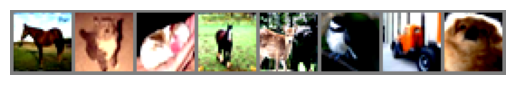

horse cat dog horse deer bird truck dog


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Function to unnormalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # Reverse normalization (undo mean and std adjustment)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Load a batch of images from the training loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show a grid of images
imshow(torchvision.utils.make_grid(images[:8]))  # Display first 8 images in the batch
print(' '.join(f'{train_dataset.dataset.classes[labels[j]]}' for j in range(8)))


**Define the CNN Architectures**

Use *ResNet-18* and train it from scratch, and then compare with some other small scale networks. For example, compare it with *AlexNet*.

**1.** *ResNet-18 Model*

Epoch 1/10 - Training: 100%|██████████| 625/625 [09:30<00:00,  1.10it/s]


Epoch 1/10 - Train Loss: 1.4296, Train Acc: 48.60%, Val Loss: 1.1720, Val Acc: 57.65%


Epoch 2/10 - Training: 100%|██████████| 625/625 [09:27<00:00,  1.10it/s]


Epoch 2/10 - Train Loss: 1.0271, Train Acc: 63.67%, Val Loss: 0.9640, Val Acc: 66.92%


Epoch 3/10 - Training: 100%|██████████| 625/625 [09:35<00:00,  1.09it/s]


Epoch 3/10 - Train Loss: 0.8444, Train Acc: 70.43%, Val Loss: 0.9552, Val Acc: 66.99%


Epoch 4/10 - Training: 100%|██████████| 625/625 [09:31<00:00,  1.09it/s]


Epoch 4/10 - Train Loss: 0.7244, Train Acc: 74.91%, Val Loss: 0.8295, Val Acc: 71.09%


Epoch 5/10 - Training: 100%|██████████| 625/625 [09:34<00:00,  1.09it/s]


Epoch 5/10 - Train Loss: 0.6132, Train Acc: 78.67%, Val Loss: 0.7869, Val Acc: 73.09%


Epoch 6/10 - Training: 100%|██████████| 625/625 [09:35<00:00,  1.09it/s]


Epoch 6/10 - Train Loss: 0.5196, Train Acc: 81.88%, Val Loss: 0.8261, Val Acc: 73.21%


Epoch 7/10 - Training: 100%|██████████| 625/625 [09:36<00:00,  1.08it/s]


Epoch 7/10 - Train Loss: 0.4322, Train Acc: 84.89%, Val Loss: 0.8357, Val Acc: 73.80%


Epoch 8/10 - Training: 100%|██████████| 625/625 [10:15<00:00,  1.01it/s]


Epoch 8/10 - Train Loss: 0.3444, Train Acc: 87.92%, Val Loss: 0.9087, Val Acc: 73.07%


Epoch 9/10 - Training: 100%|██████████| 625/625 [09:40<00:00,  1.08it/s]


Epoch 9/10 - Train Loss: 0.2790, Train Acc: 90.20%, Val Loss: 0.9691, Val Acc: 71.87%


Epoch 10/10 - Training: 100%|██████████| 625/625 [09:39<00:00,  1.08it/s]


Epoch 10/10 - Train Loss: 0.2308, Train Acc: 91.94%, Val Loss: 0.9461, Val Acc: 74.59%


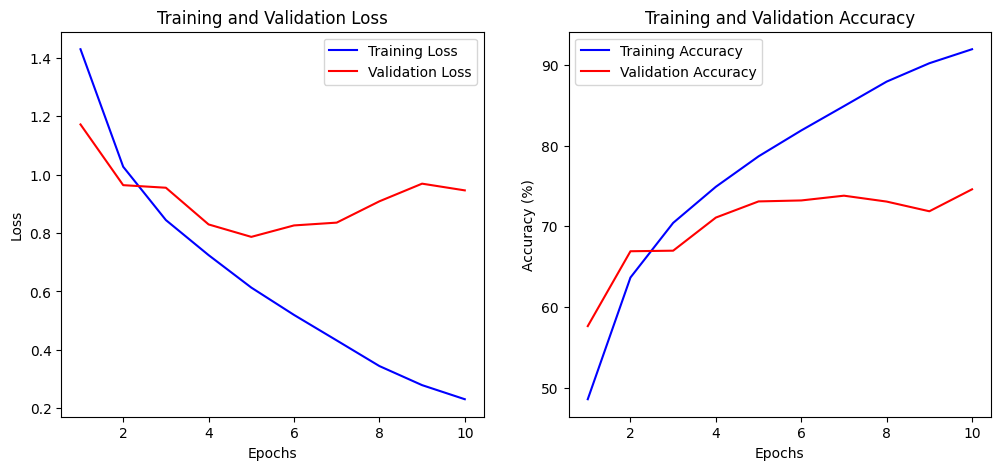

In [11]:
import torch
import torchvision.models as models
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm

# Define ResNet-18 model
model_resnet18 = models.resnet18(pretrained=False)  # Train from scratch
model_resnet18.fc = nn.Linear(model_resnet18.fc.in_features, 10)  # Modify output layer for CIFAR-10 classes

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_resnet18 = model_resnet18.to(device)

# Define optimizer and loss function
optimizer = optim.Adam(model_resnet18.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training and validation loop
num_epochs = 10  # Set number of epochs to 10
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    # Training phase
    model_resnet18.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        # Forward pass
        outputs = model_resnet18(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    # Calculate training loss and accuracy
    train_loss = running_loss / total_train
    train_accuracy = 100.0 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase
    model_resnet18.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_resnet18(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    # Calculate validation loss and accuracy
    val_loss = val_loss / total_val
    val_accuracy = 100.0 * correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

# Plotting the training and validation loss/accuracy
epochs = range(1, num_epochs+1)
plt.figure(figsize=(12, 5))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


**2. AlexNet Model**

In [38]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define transformations: normalize the images to have mean and std based on CIFAR-10 statistics
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

# Load the CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Define the training and validation split sizes
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

# Split the training dataset into training and validation sets
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Create DataLoader objects for each dataset
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

# Check the sizes of the datasets
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")


Files already downloaded and verified
Files already downloaded and verified
Training set size: 40000
Validation set size: 10000
Test set size: 10000


Epoch 1/10 - Training: 100%|██████████| 625/625 [20:29<00:00,  1.97s/it]


Epoch 1/10 - Train Loss: 1.6416, Train Acc: 37.57%, Val Loss: 1.2852, Val Acc: 52.35%


Epoch 2/10 - Training: 100%|██████████| 625/625 [26:20<00:00,  2.53s/it]


Epoch 2/10 - Train Loss: 1.2246, Train Acc: 55.33%, Val Loss: 1.1284, Val Acc: 60.44%


Epoch 3/10 - Training: 100%|██████████| 625/625 [26:04<00:00,  2.50s/it]


Epoch 3/10 - Train Loss: 1.0265, Train Acc: 63.43%, Val Loss: 1.0106, Val Acc: 65.35%


Epoch 4/10 - Training: 100%|██████████| 625/625 [25:35<00:00,  2.46s/it]


Epoch 4/10 - Train Loss: 0.9084, Train Acc: 68.15%, Val Loss: 0.8956, Val Acc: 68.28%


Epoch 5/10 - Training: 100%|██████████| 625/625 [25:31<00:00,  2.45s/it]


Epoch 5/10 - Train Loss: 0.8252, Train Acc: 71.25%, Val Loss: 0.8954, Val Acc: 70.02%


Epoch 6/10 - Training: 100%|██████████| 625/625 [25:29<00:00,  2.45s/it]


Epoch 6/10 - Train Loss: 0.7541, Train Acc: 74.00%, Val Loss: 0.8518, Val Acc: 71.55%


Epoch 7/10 - Training: 100%|██████████| 625/625 [25:27<00:00,  2.44s/it]


Epoch 7/10 - Train Loss: 0.6930, Train Acc: 75.66%, Val Loss: 0.7949, Val Acc: 72.75%


Epoch 8/10 - Training: 100%|██████████| 625/625 [25:19<00:00,  2.43s/it]


Epoch 8/10 - Train Loss: 0.6475, Train Acc: 77.43%, Val Loss: 0.7647, Val Acc: 73.89%


Epoch 9/10 - Training: 100%|██████████| 625/625 [25:15<00:00,  2.42s/it]


Epoch 9/10 - Train Loss: 0.5973, Train Acc: 79.40%, Val Loss: 0.7887, Val Acc: 73.58%


Epoch 10/10 - Training: 100%|██████████| 625/625 [25:13<00:00,  2.42s/it]


Epoch 10/10 - Train Loss: 0.5592, Train Acc: 80.27%, Val Loss: 0.8004, Val Acc: 74.15%


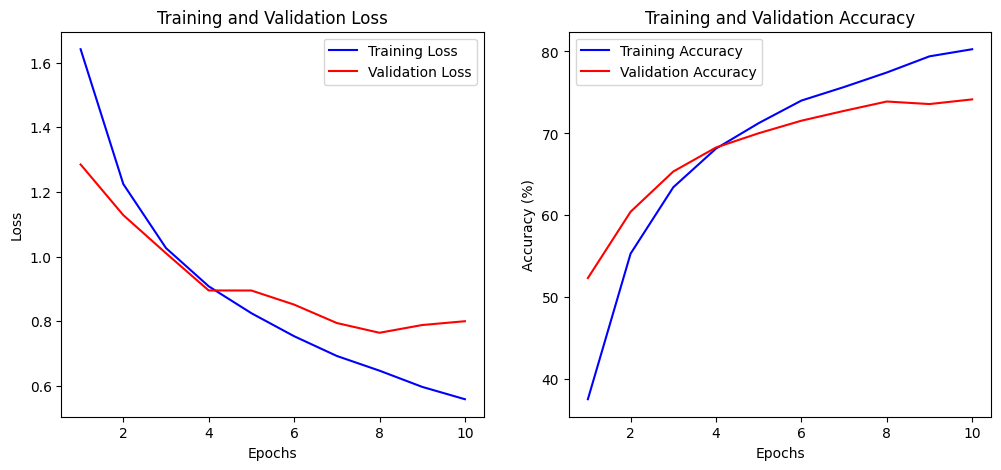

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define AlexNet model
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 4 * 4, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Initialize the model
model_alexnet = AlexNet()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_alexnet = model_alexnet.to(device)

# Define optimizer and loss function
optimizer = optim.Adam(model_alexnet.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 10
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    # Training phase
    model_alexnet.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        # Forward pass
        outputs = model_alexnet(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    # Calculate training loss and accuracy
    train_loss = running_loss / total_train
    train_accuracy = 100.0 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation phase
    model_alexnet.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_alexnet(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    # Calculate validation loss and accuracy
    val_loss = val_loss / total_val
    val_accuracy = 100.0 * correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

# Plot the training and validation loss/accuracy
epochs = range(1, num_epochs+1)
plt.figure(figsize=(12, 5))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'b', label='Training Loss')
plt.plot(epochs, val_losses, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


**Model Evaluation**

**1.** *ResNet-18*

In [40]:
# Testing the model
model_resnet18.eval()  # Set the model to evaluation mode
correct_test = 0
total_test = 0
test_loss = 0.0

with torch.no_grad():  # No need to compute gradients during inference
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model_resnet18(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)

        # Get predictions
        _, predicted = outputs.max(1)

        total_test += labels.size(0)
        correct_test += predicted.eq(labels).sum().item()

# Calculate test accuracy and loss
test_accuracy = 100.0 * correct_test / total_test
test_loss = test_loss / total_test

# Print the results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Loss: 0.9308
Test Accuracy: 74.29%


**2.** *AlexNet*

In [41]:
# Test phase
model_alexnet.eval()  # Set the model to evaluation mode
test_loss = 0.0
correct_test = 0
total_test = 0

with torch.no_grad():  # Disable gradient computation during evaluation
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model_alexnet(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)

        # Get the predictions and compare with the true labels
        _, predicted = outputs.max(1)
        total_test += labels.size(0)
        correct_test += predicted.eq(labels).sum().item()

# Calculate test loss and accuracy
test_loss = test_loss / total_test
test_accuracy = 100.0 * correct_test / total_test

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


Test Loss: 0.7818, Test Accuracy: 74.61%
